<a href="https://colab.research.google.com/github/Valepowell/CertificacionesDS/blob/main/Correlaci%C3%B3n_(Pr%C3%A1ctica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlación (Práctica)
Aplicación Práctica

Para consolidar tus conocimientos, realiza la siguiente actividad práctica:

- Cargar y Limpiar el Dataset: Utiliza un dataset de Kaggle relacionado con ventas, salud o cualquier otro tema de interés.
- Calcular las Correlaciones: Calcula las correlaciones de Pearson, Spearman y Kendall entre las variables del dataset.
- Crear Mapas de Calor: Crea mapas de calor para cada tipo de correlación y analiza las relaciones entre las variables.
- Interpretar los Resultados: Escribe un breve informe sobre las correlaciones encontradas y cómo pueden influir en el análisis de datos y la toma de decisiones.

In [1]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/BBDD/winequality-red.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


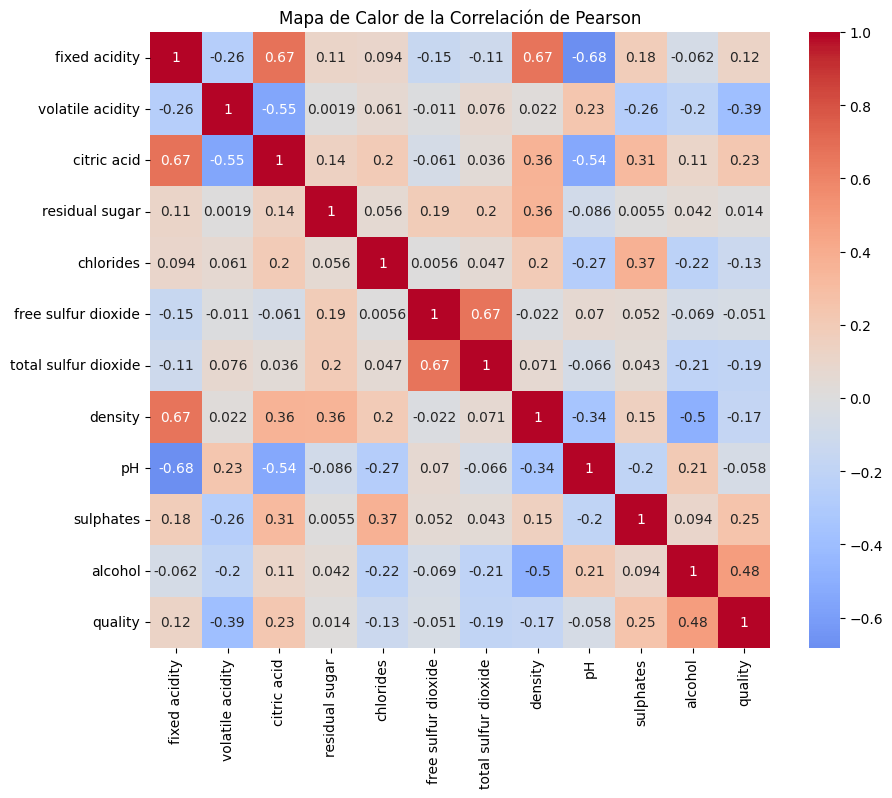

In [9]:
# Calcular las correlaciones
correlation_matrix = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()


# Interpretación de los resultados:
# Pearson (relación lineal)
# alcohol y quality: correlación positiva más alta (~0.48).
# density correlaciona negativamente con alcohol (~0,5) y quality (~0,17).
# Variables como volatile acidity tienen correlación negativa con la calidad (~0,39).

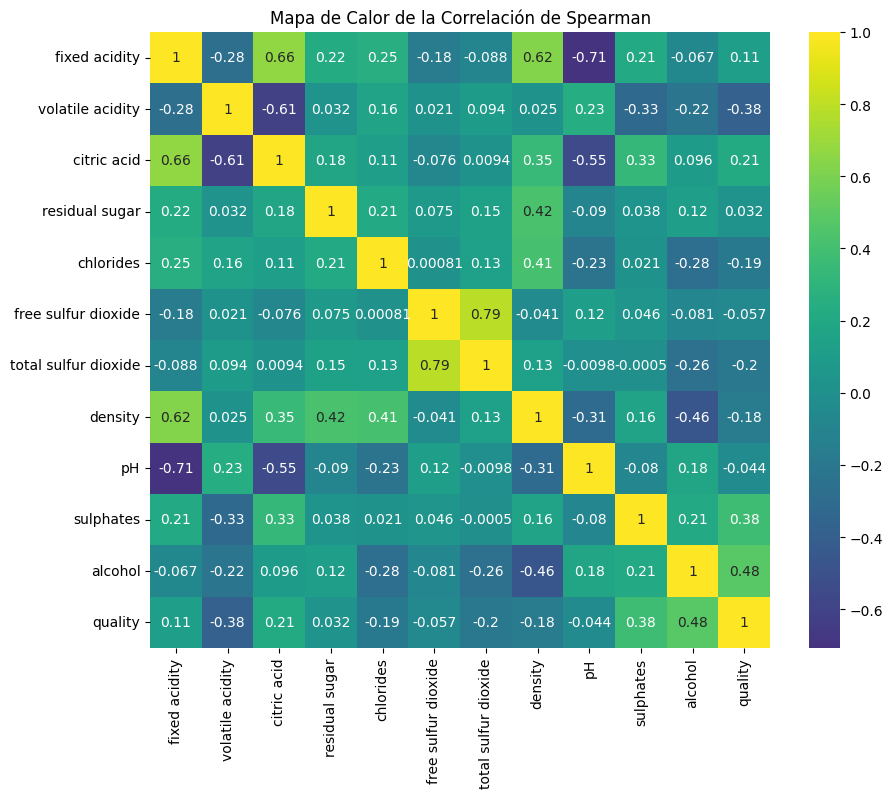

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

# Interpretación de los resultados:
# Spearman (monótona)
# Confirmamos una relación creciente entre alcohol y calidad (quality) aunque no necesariamente lineal.
# Algunas variables muestran una correlación ligeramente diferente que en Pearson, lo que puede indicar relaciones no lineales pero consistentes en orden.

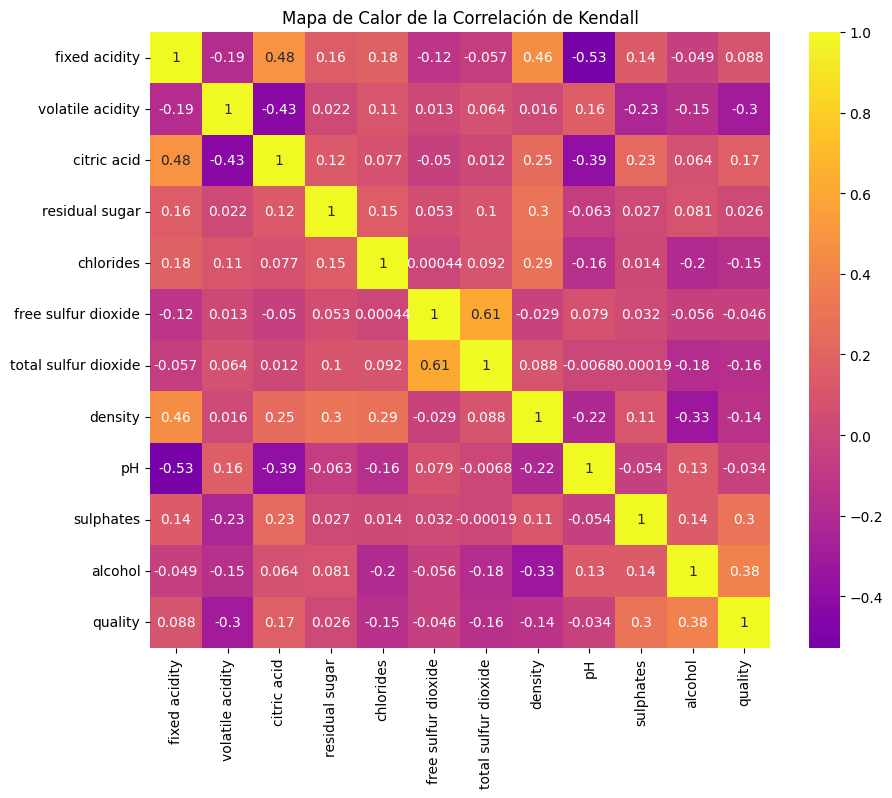

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

# Interpretación de los resultados:
# Kendall (monótona más conservadora)
# Similar a Spearman, pero con coeficientes más bajos en relacion a calidad (quality)
# (alcohol ~0.48), datos con pequeños cambios respecto a las correlaciones anteriores.

**Interpretar los Resultados:**
Análisis de Correlaciones del Dataset de Vinos.

El análisis de correlación ayuda a comprender la relación entre las características físico-químicas del vino y su calidad percibida.

Alcohol v/s Calidad: se puede observar que existe una correlación positiva entre el contenido de alcohol y la calidad del vino, especialmente en la correlación de Pearson (~0.48). Esto sugiere que, en general, los vinos con mayor graduación alcohólica tienden a ser valorados como de calidad.

Acidez Volátil, Densidad v/s y Calidad: Se observa una correlación negativa con la calidad, indicando que niveles altos de acidez volátil y/o Densidad disminuyen la valoración de calidad del vino.

Sulfatos v/s Calidad: Correlación moderadamente positiva. Su presencia puede mejorar la valoración del vino.
